In [1]:
from tumor_model.model import TumorModel, compute_MTD
from mesa.batchrunner import BatchRunner
import numpy as np

fixed_params = {
    "width": 20,
    "height": 20,
    "treatment_cycles": 0,
    "initial_tumor_size": 8 # 40mm
}

variable_params = {
    "param_scale": np.linspace(0.5, 1.0, num=10)
}

batch_run = BatchRunner(
    TumorModel,
    variable_params,
    fixed_params,
    iterations=10,
    max_steps=85,
    model_reporters={"MTD": compute_MTD}
)

batch_run.run_all()

100it [01:57,  1.17s/it]


,param_scale,Run,MTD,width,height,treatment_cycles,initial_tumor_size
0,0.5,0,60.621778,20,20,0,8
1,0.5,1,61.441029,20,20,0,8
2,0.5,2,65.000000,20,20,0,8
3,0.5,3,62.048368,20,20,0,8
4,0.5,4,63.639610,20,20,0,8
...,...,...,...,...,...,...,...
95,1.0,95,76.485293,20,20,0,8
96,1.0,96,77.781746,20,20,0,8
97,1.0,97,79.843597,20,20,0,8
98,1.0,98,71.937473,20,20,0,8


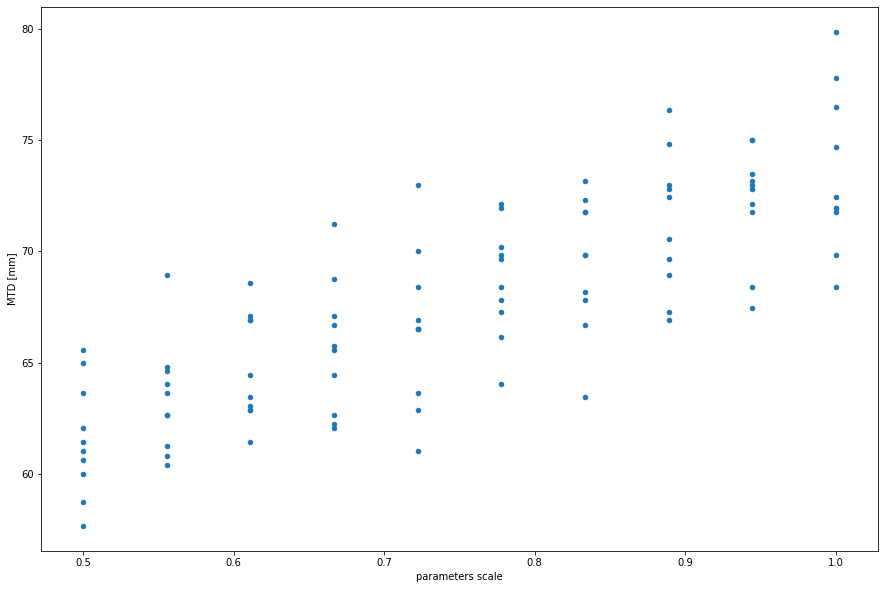

In [2]:
import matplotlib.pyplot as plt

run_data = batch_run.get_model_vars_dataframe()
ax = run_data.plot.scatter(x='param_scale', y='MTD', figsize=(15,10))
ax.set_xlabel("parameters scale")
ax.set_ylabel("MTD [mm]")
run_data

In [3]:
df = run_data[['param_scale','MTD']]
df.groupby('param_scale').agg(['var', 'mean'])

MTD           
                   var       mean
param_scale                      
0.500000      6.586084  61.575746
0.555556      6.189873  63.379248
0.611111      5.780663  64.747953
0.666667      8.779389  65.647533
0.722222     12.133924  66.532544
0.777778      6.410220  68.733040
0.833333      8.942530  69.476267
0.888889      9.859219  71.264484
0.944444      6.282506  72.210427
1.000000     13.071301  73.506706

In [4]:
import pandas as pd
from tqdm.notebook import tqdm

frames_no_treat = []

for _ in tqdm(range(50)):
    model = TumorModel(
        width=20,
        height=20,
        param_scale=0.5,
        treatment_cycles=0,
        initial_tumor_size=2
    )
    
    for _ in range(300):
        model.step()
    
    frames_no_treat.append(model.datacollector.get_model_vars_dataframe())

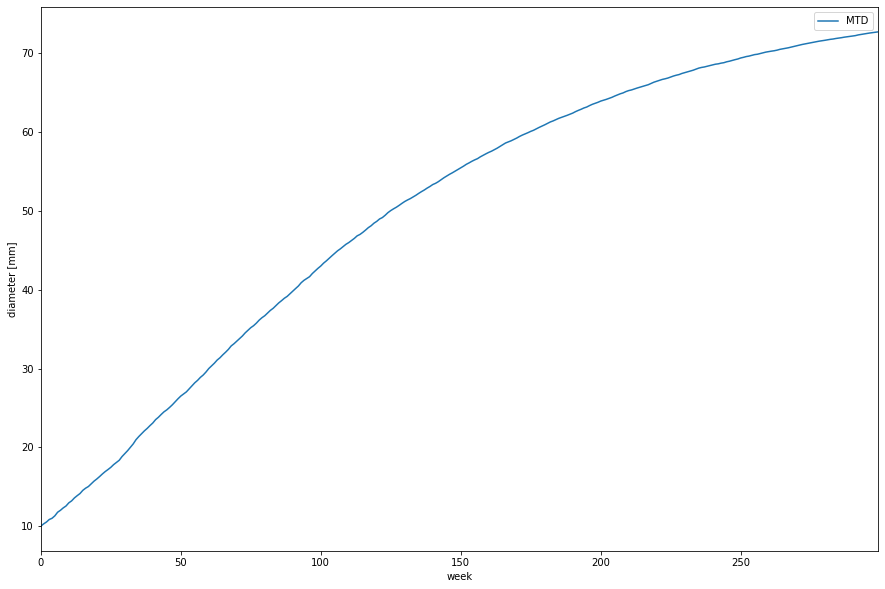

In [5]:
concated = pd.concat(frames_no_treat)
concated['step'] = concated.index
concated.reset_index(drop=True)

df_no_treat = concated.groupby('step').agg({'MTD': 'mean'}).reset_index()
ax = df_no_treat.plot(x='step', y='MTD', figsize=(15,10))
ax.set_ylabel("diameter [mm]")
ax.set_xlabel("week")

plt.show()


0


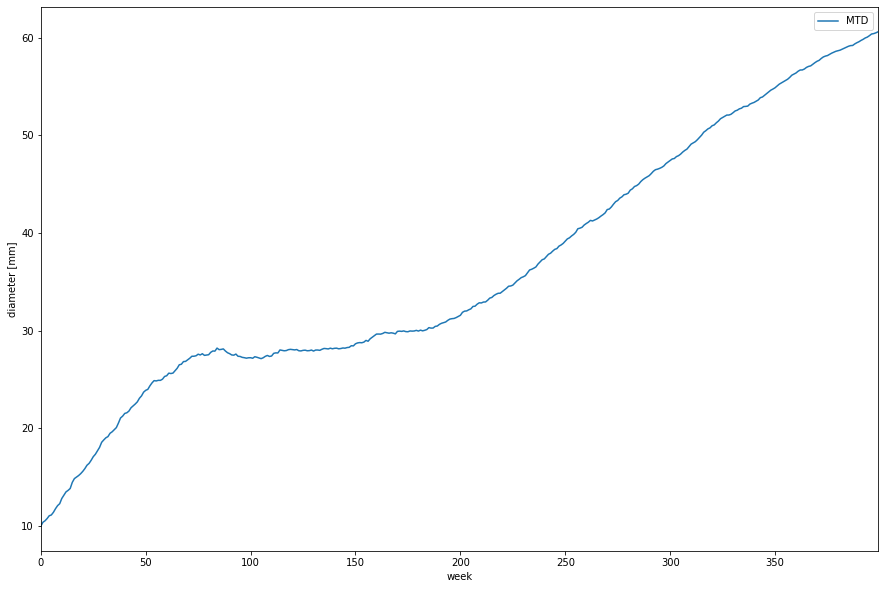


40


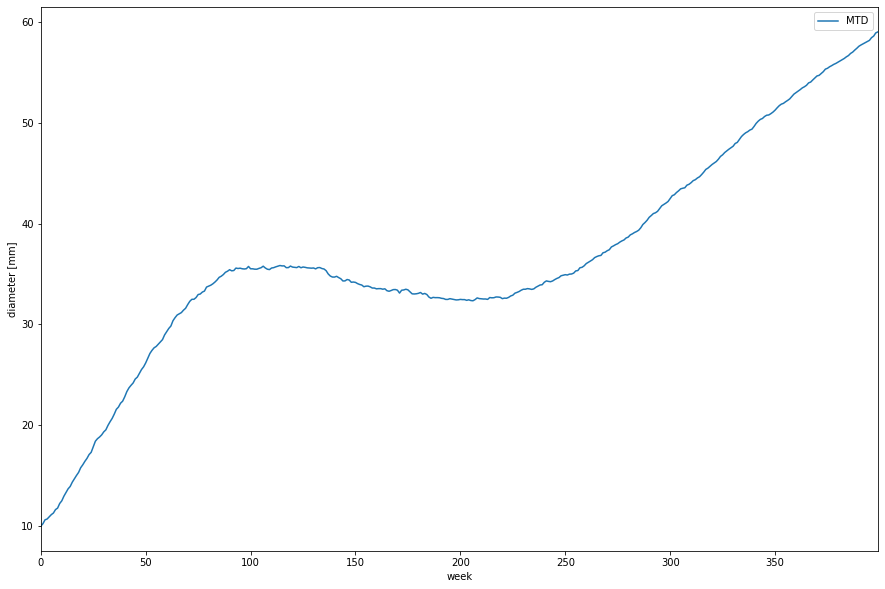


80


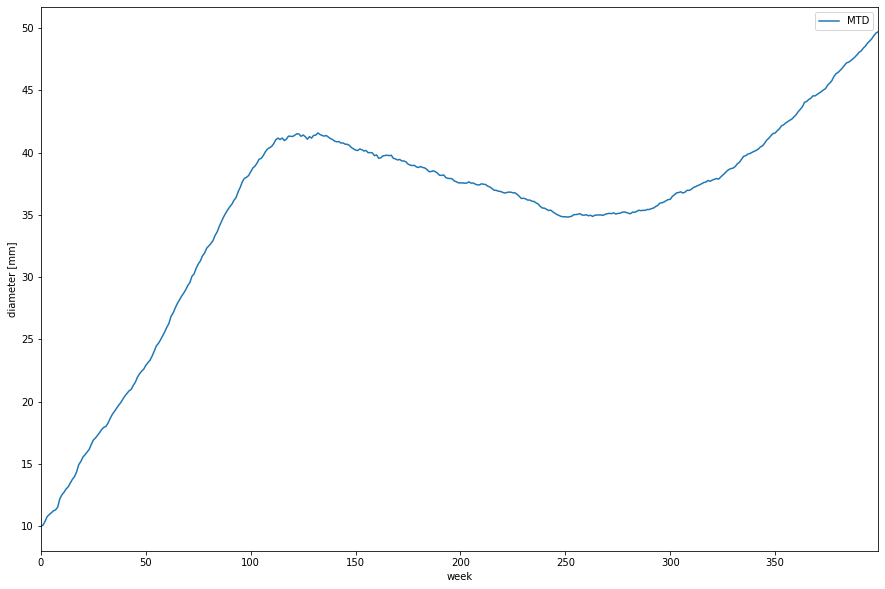


120


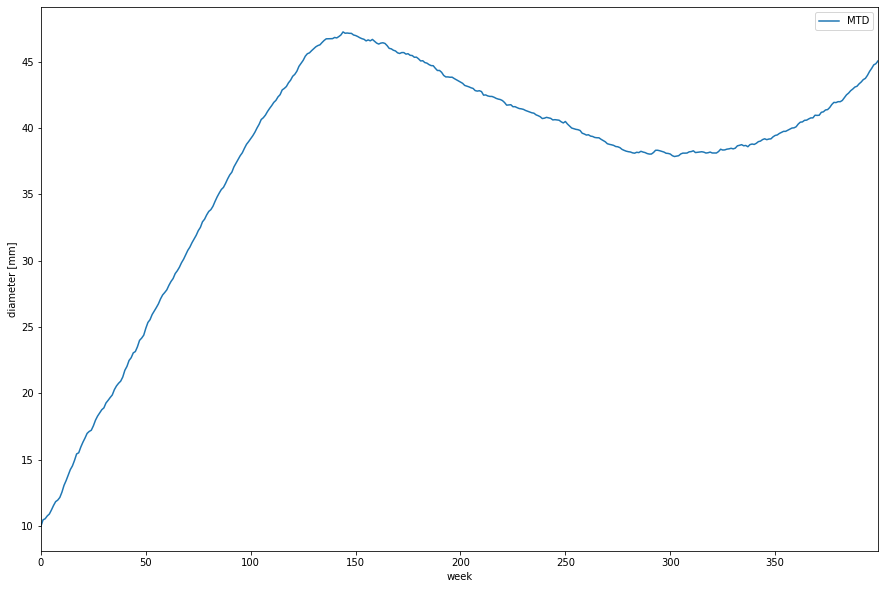


160


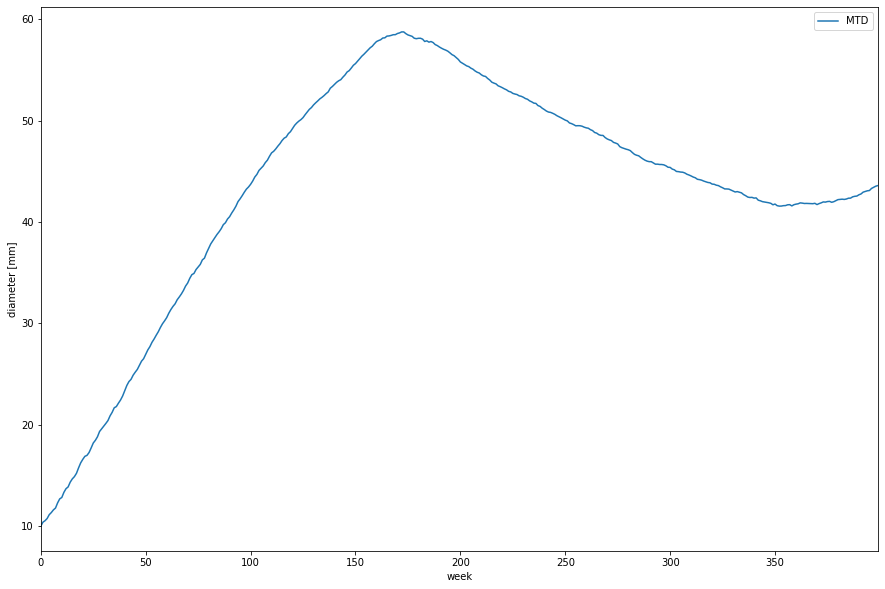


200


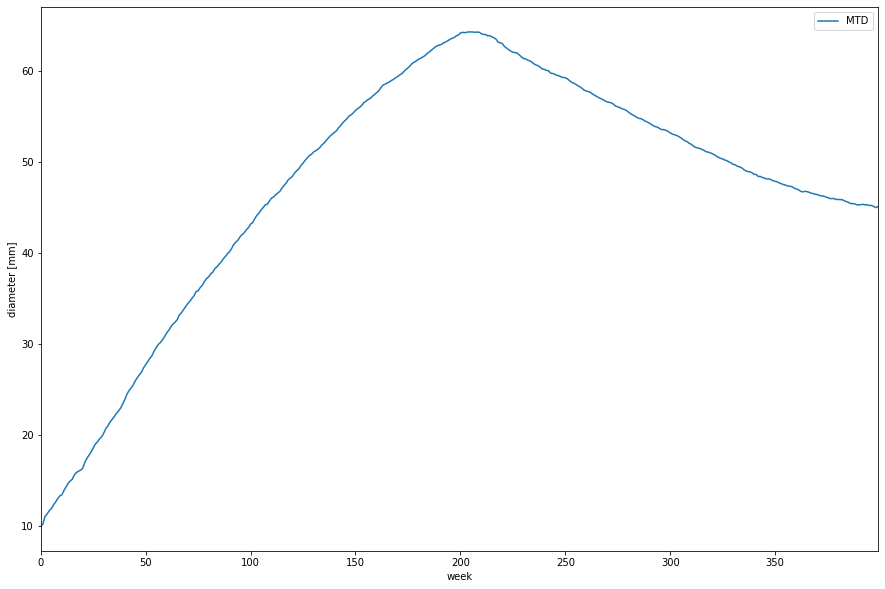

In [6]:
for initial_treatment_offset in range(0, 201, 40):
    frames_treat = []

    for _ in tqdm(range(15)):
        model = TumorModel(
            width=20,
            height=20,
            param_scale=0.5,
            treatment_cycles=30,
            first_cycle_offset=initial_treatment_offset,
            treatment_cycle_interval=4,
            initial_tumor_size=2
        )

        for _ in range(400):
            model.step()

        frames_treat.append(model.datacollector.get_model_vars_dataframe())
    concated = pd.concat(frames_treat)
    concated['step'] = concated.index
    concated.reset_index(drop=True)

    print(initial_treatment_offset)
    df_treat = concated.groupby('step').agg({'MTD': 'mean'}).reset_index()
    
    ax = df_treat.plot(x='step', y='MTD', figsize=(15,10))
    ax.set_ylabel("diameter [mm]")
    ax.set_xlabel("week")

    plt.show()